In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The
data set contains nine cellular indicators of breast cancer for 683 patients.

In [5]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")
data

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
data.columns = ['patient_id','thickness','size_uniformity','shape_uniformity','adhesion','cell_size','bare_nuclei',
               'chromatin','nucleoli','mitosis','cancer']

In [12]:
data

,patient_id,thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,chromatin,nucleoli,mitosis,cancer
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.metrics import plot_roc_curve, confusion_matrix

1. Patient id number
2. Clump Thickness (1-10)
3. Uniformity of Cell Size (1-10)
4. Uniformity of Cell Shape (1-10)
5. Marginal Adhesion (1-10)
6. Single Epithelial Cell Size (1-10)
7. Bare Nuclei (1-10)
8. Bland Chromatin (1-10)
9. Normal Nucleoli (1-10)
10. Mitoses (1-10)
11. Class: (2 for benign, 4 for malignant)

In [28]:
thickness = data.thickness.to_numpy()
size_unformity = data.size_uniformity.to_numpy()
shape_uniformity = data.shape_uniformity.to_numpy()
adhesion = data.adhesion.to_numpy()
cell_size = data.cell_size.to_numpy()
bare_nuclei = data.bare_nuclei.to_numpy()
chromatin = data.chromatin.to_numpy()
nucleoli = data.nucleoli.to_numpy()
mitosis = data.mitosis.to_numpy()
cancer = data.cancer.to_numpy()

In [34]:
print(data.columns)

Index(['patient_id', 'thickness', 'size_uniformity', 'shape_uniformity',
       'adhesion', 'cell_size', 'bare_nuclei', 'chromatin', 'nucleoli',
       'mitosis', 'cancer'],
      dtype='object')


Let's see if we can see any obvious correlations between the features.

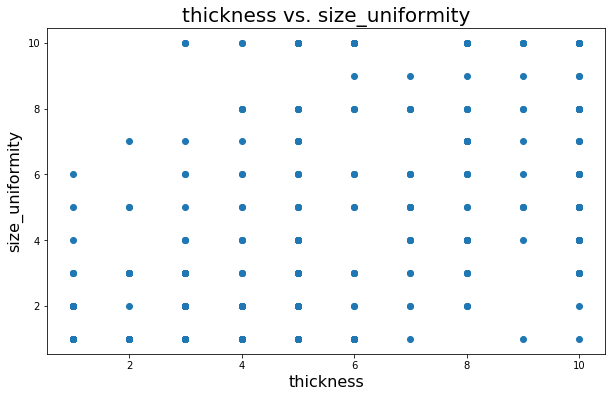

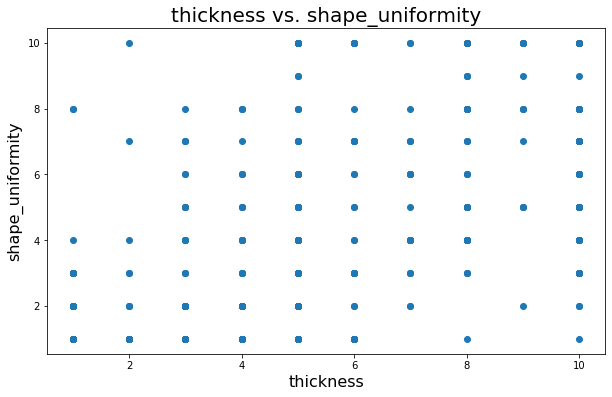

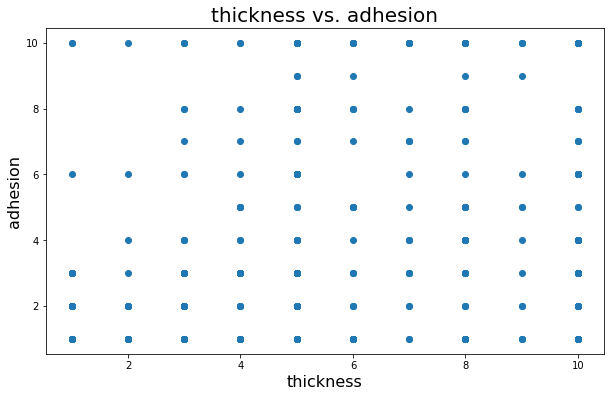

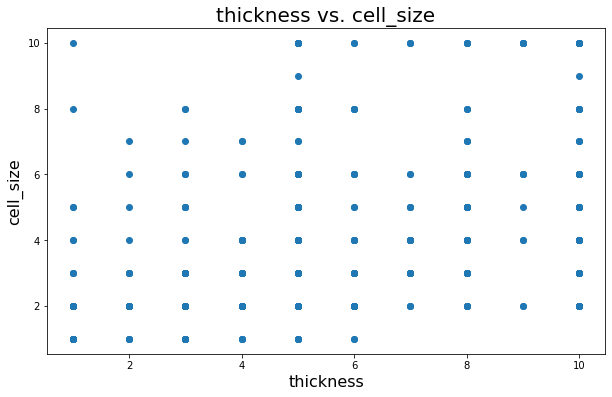

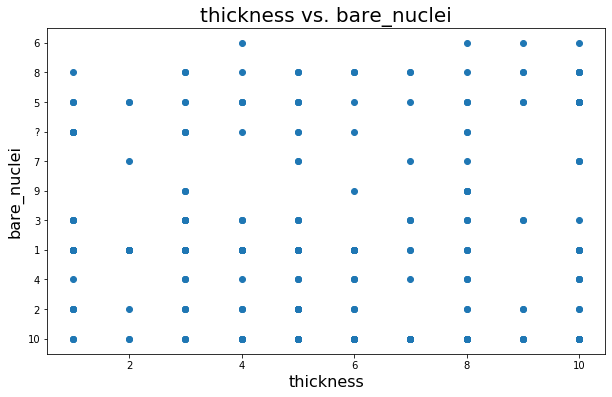

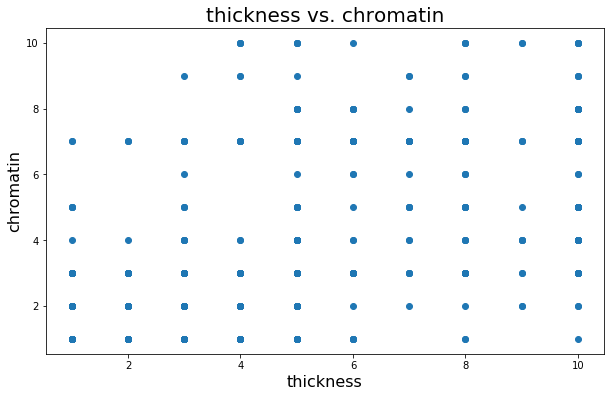

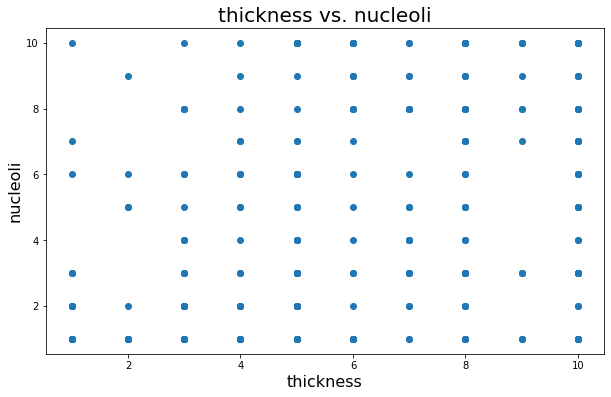

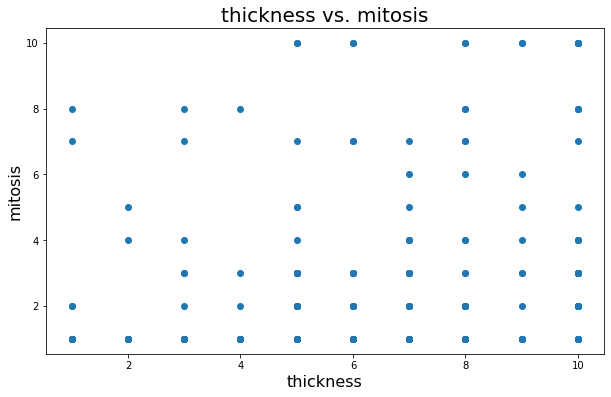

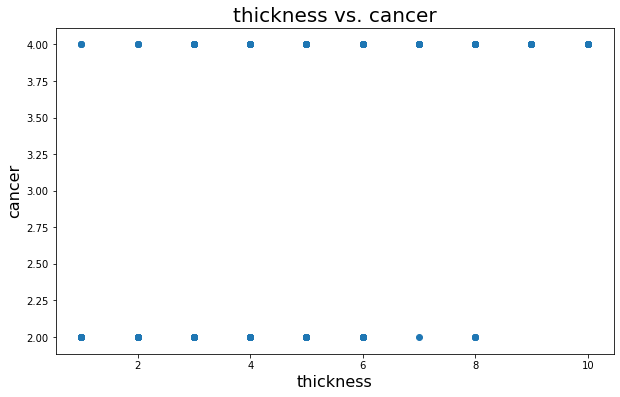

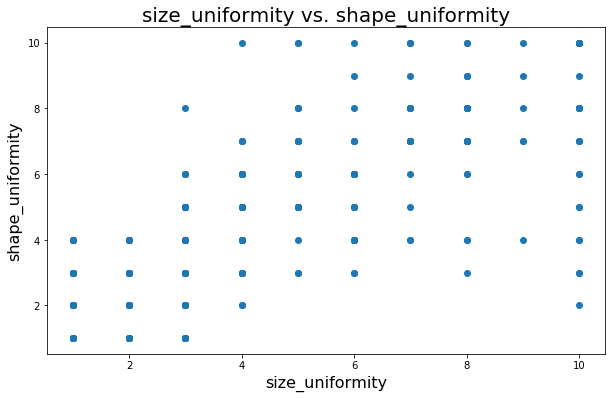

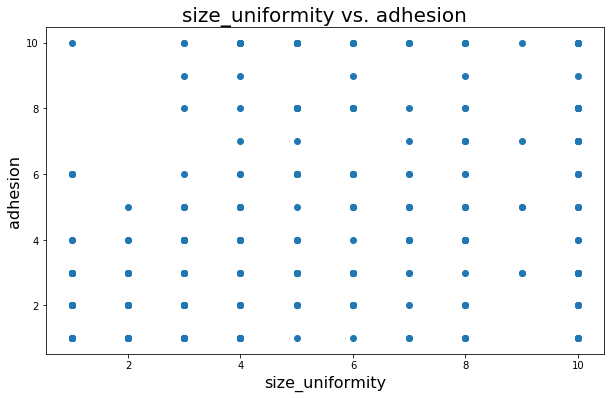

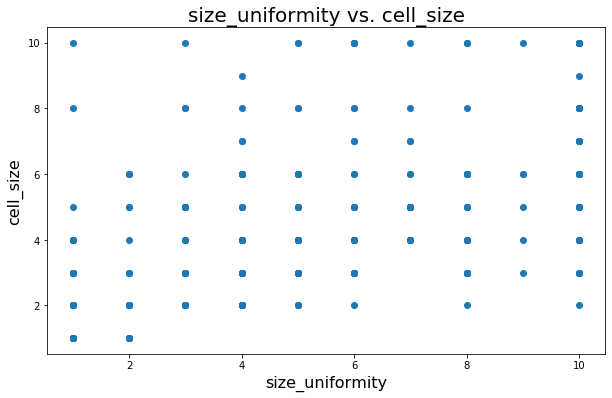

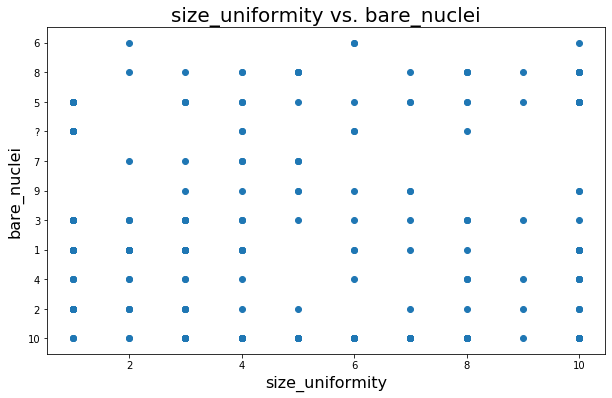

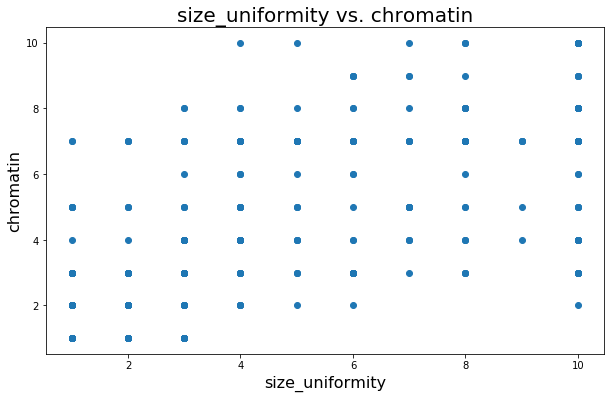

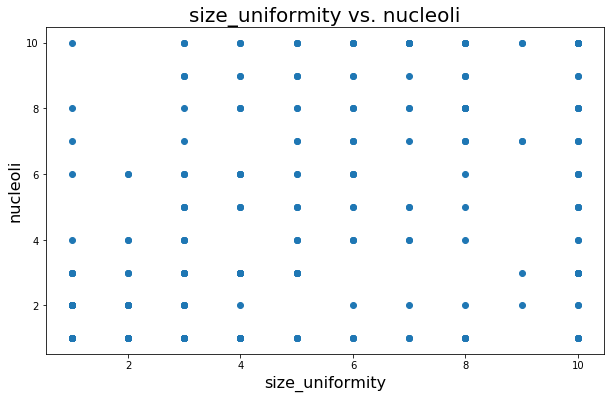

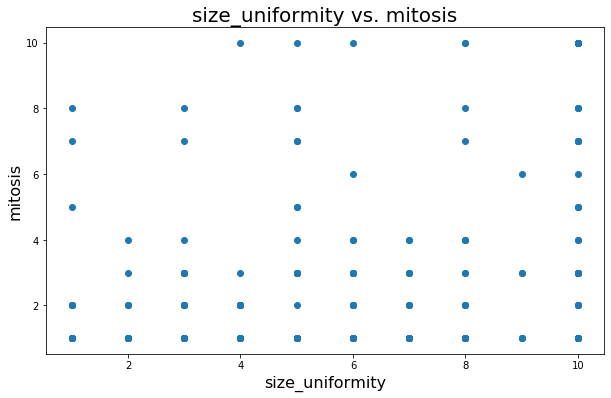

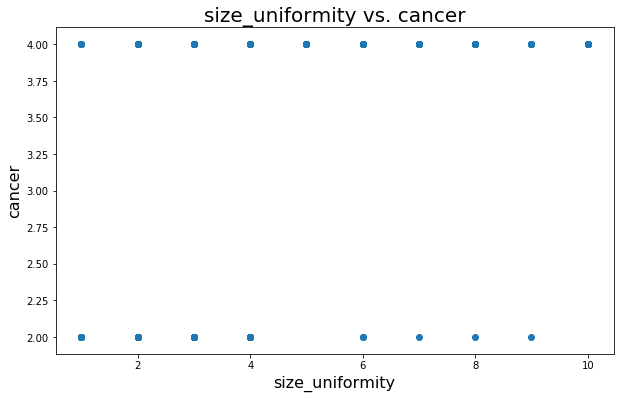

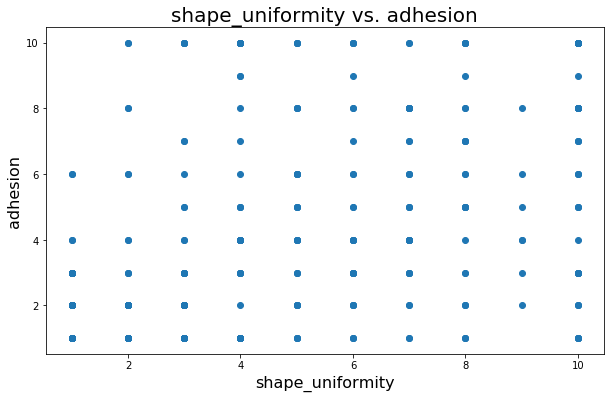

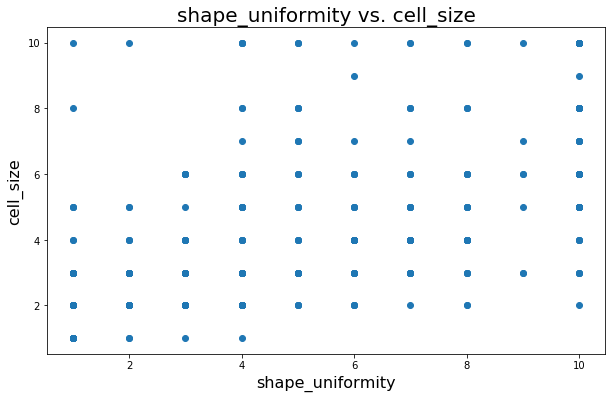

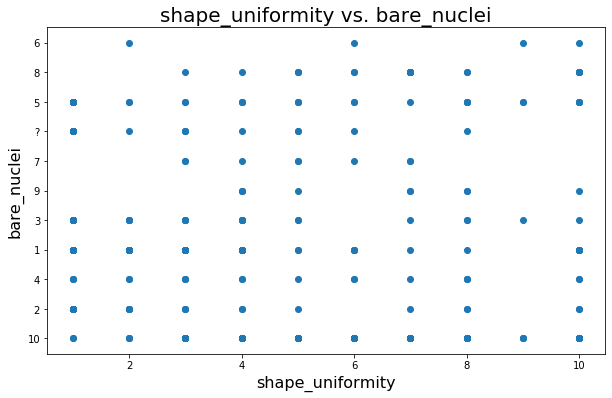

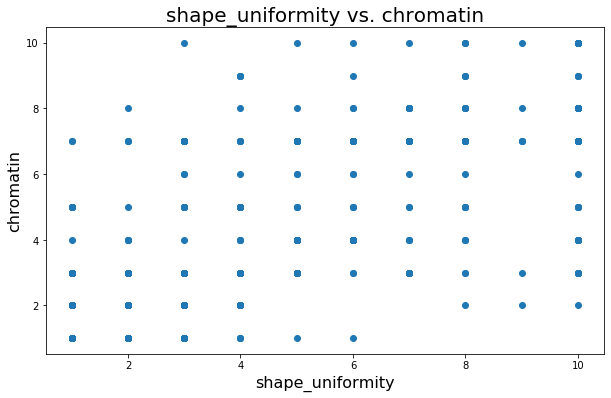

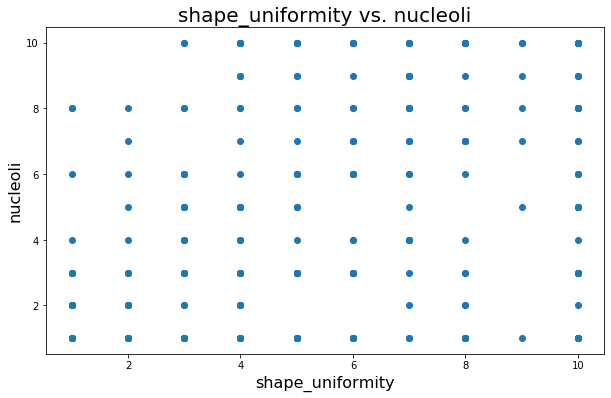

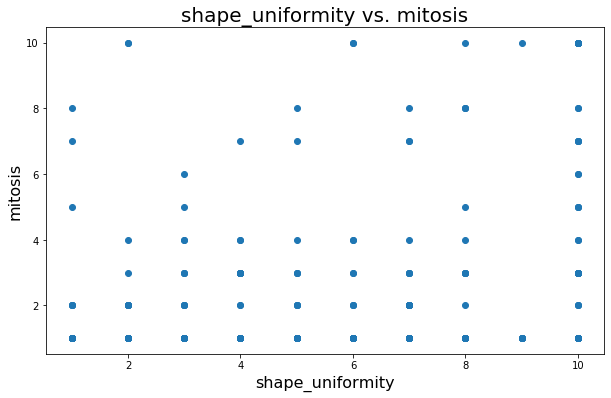

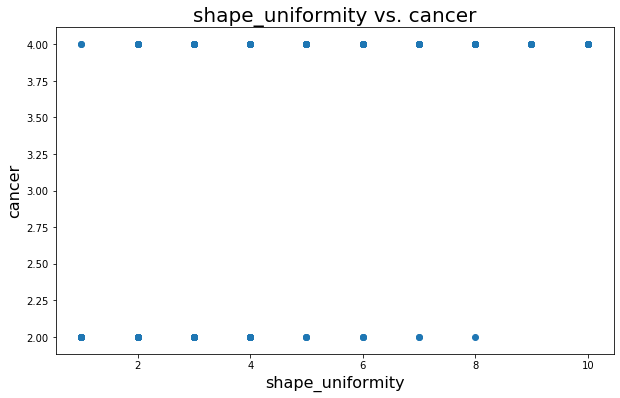

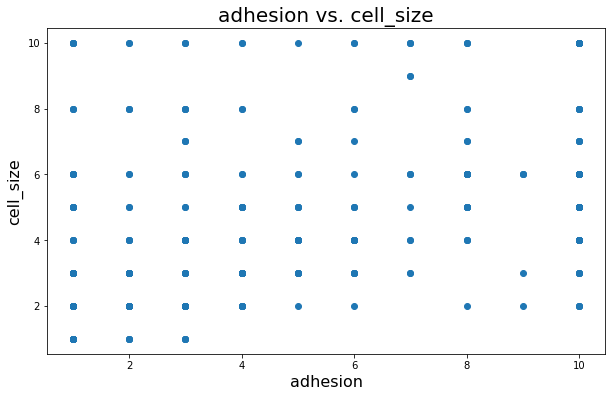

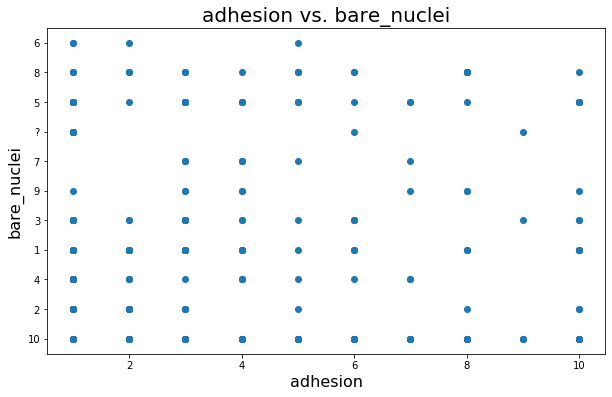

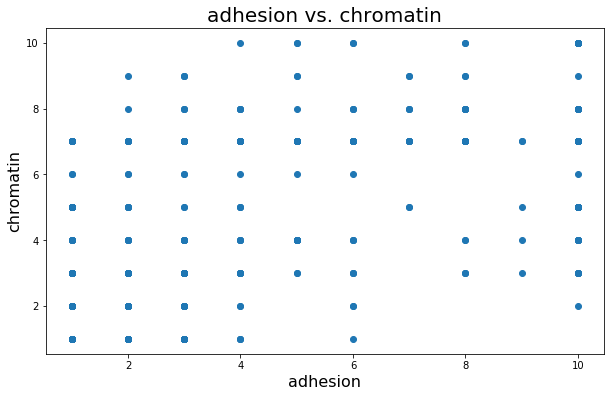

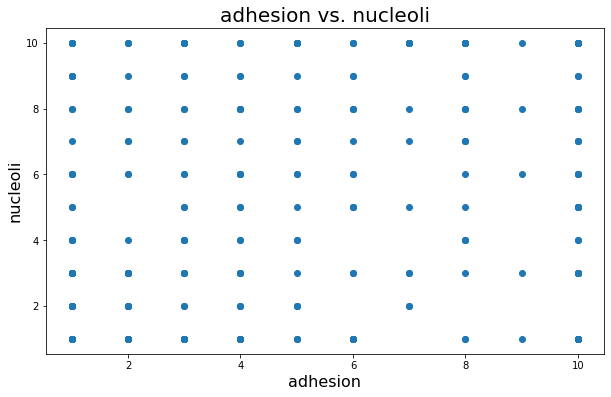

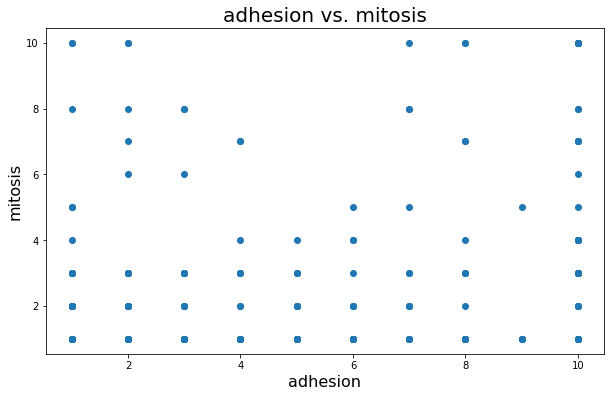

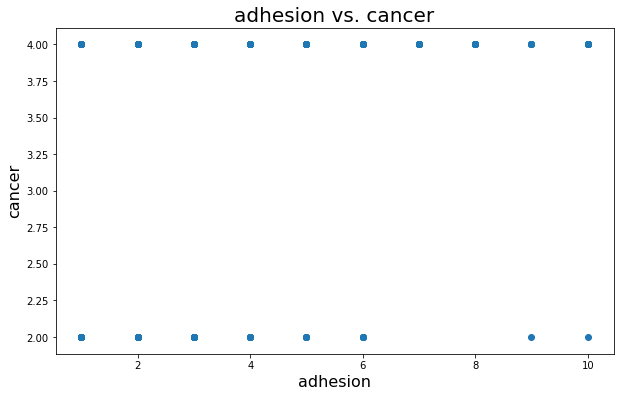

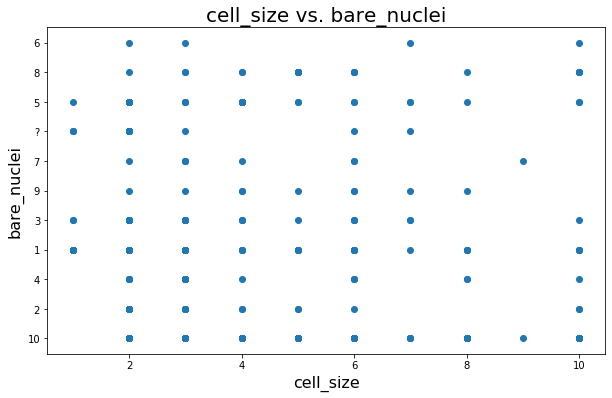

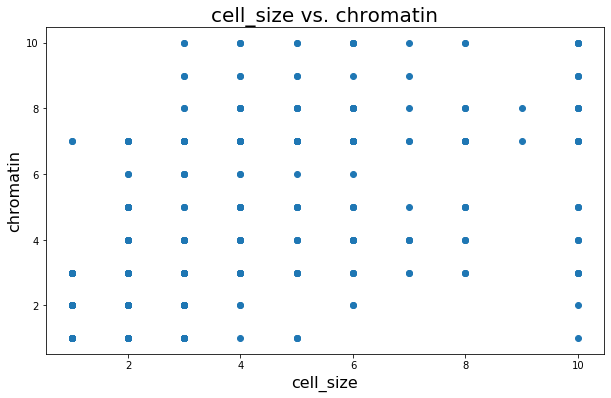

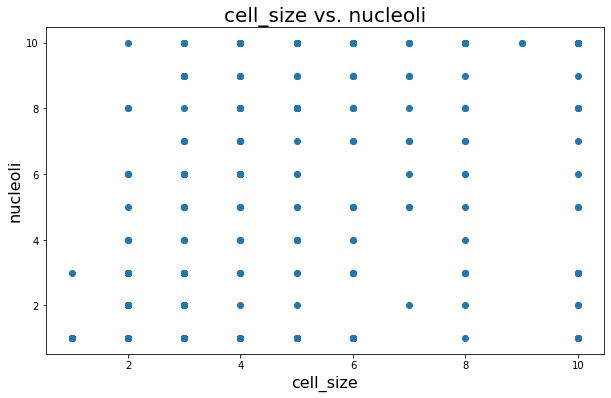

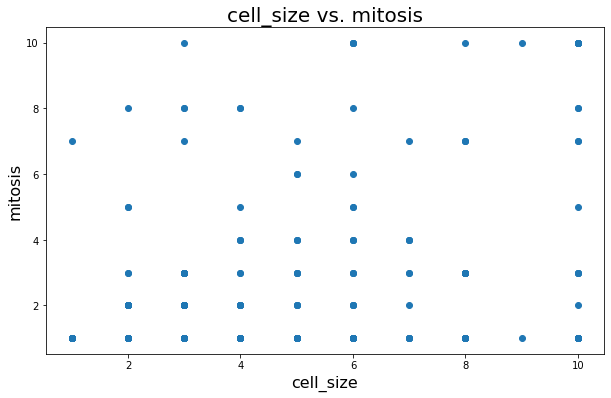

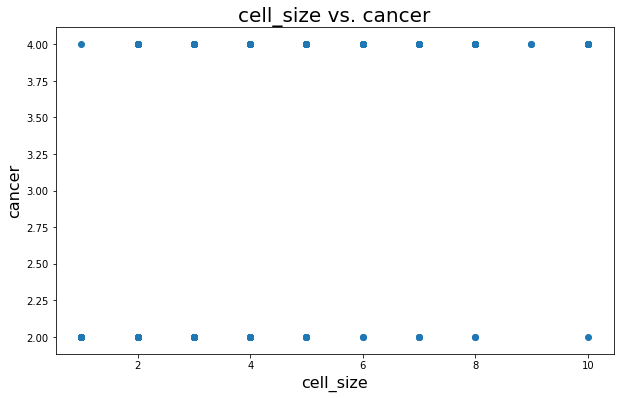

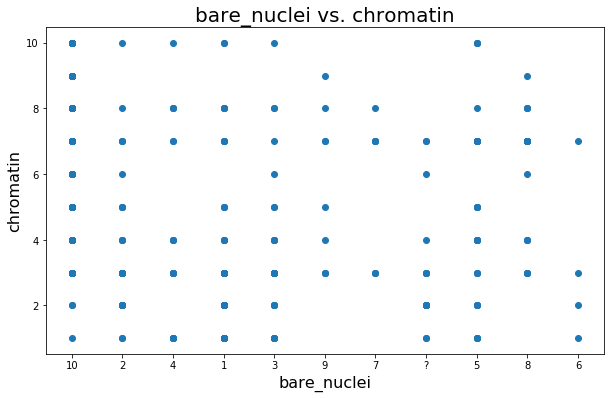

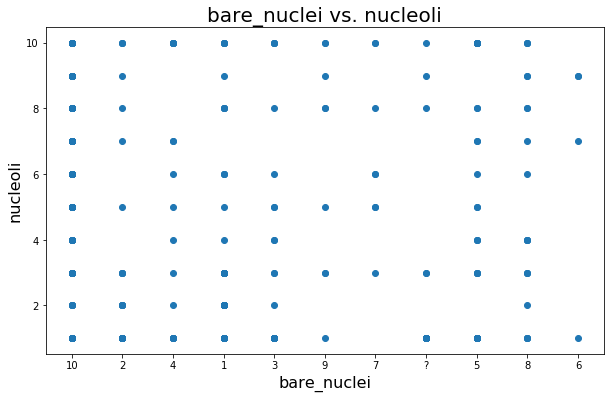

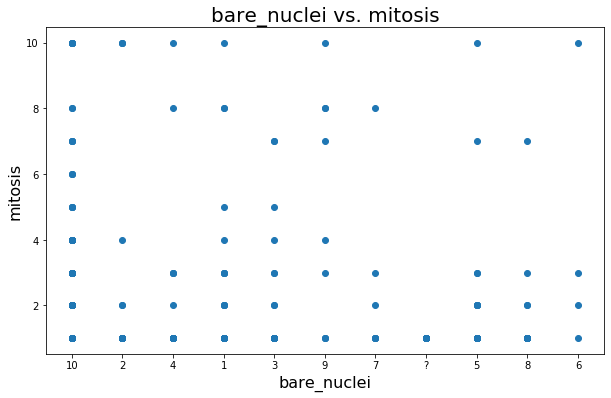

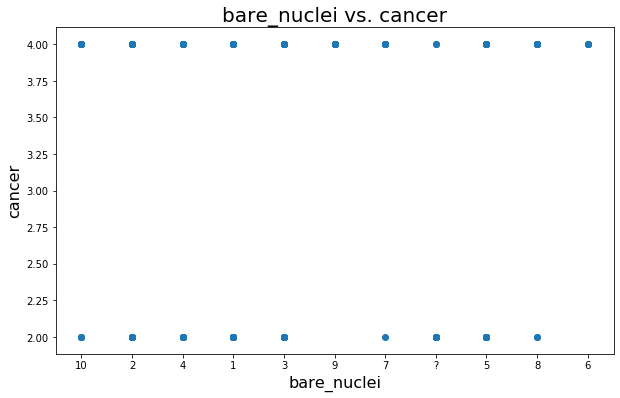

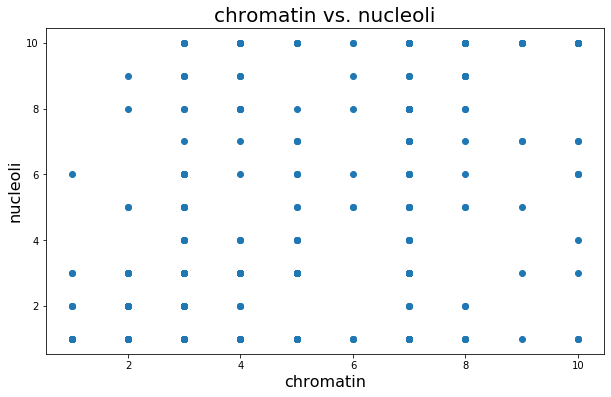

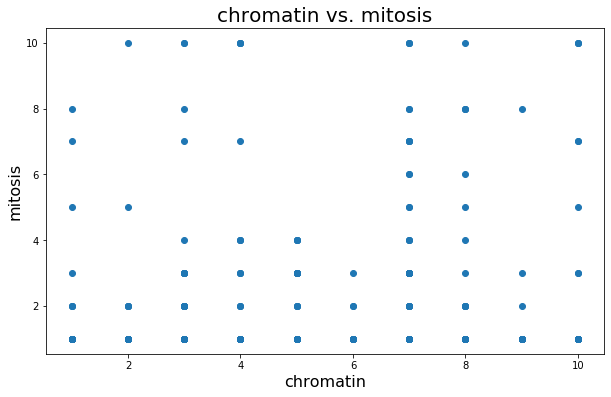

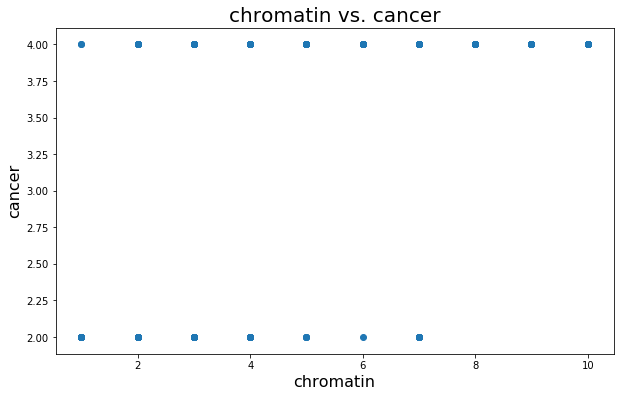

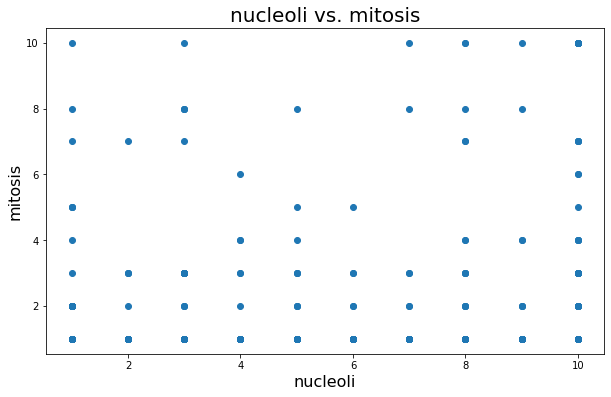

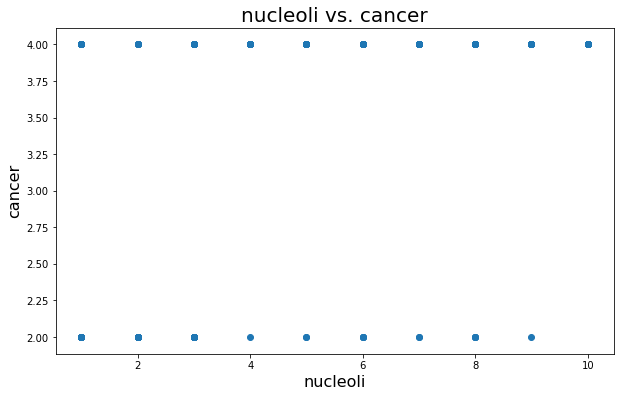

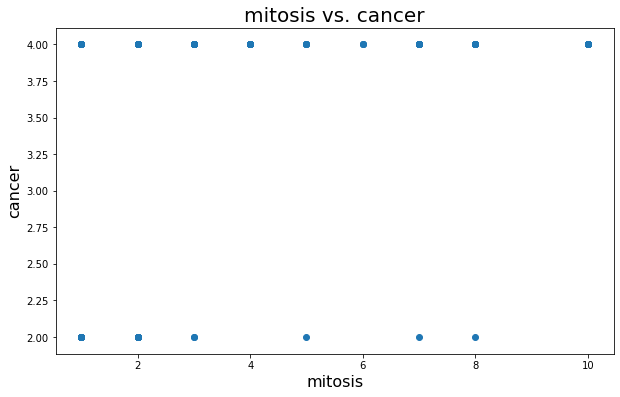

In [53]:
scattered = []
for column in data.columns:
    for other_column in data.columns:
        if column == other_column or column=='cancer':
            pass
        elif column == 'patient_id' or other_column =='patient_id':
            pass
        elif (column, other_column) in scattered or (other_column, column) in scattered:
            pass
        else:
            scattered.append((column, other_column))
            scattered.append((other_column, column))
            plt.title(f"{column} vs. {other_column}", fontsize=20)
            plt.scatter(data[column], data[other_column])
            plt.xlabel(column,fontsize=16)
            plt.ylabel(other_column,fontsize=16)
            plt.gcf().set_size_inches(10,6)
            plt.savefig(f"Visualizations/1/{column} vs. {other_column}.jpg")
            plt.show()

In [21]:
thickness = label_binarize(data.thickness, classes=[1,2,3,4,5,6,7,8,9,10])
cancer = label_binarize(data.cancer, classes=[2,4])


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(thickness, cancer)

ValueError: x and y must be the same size

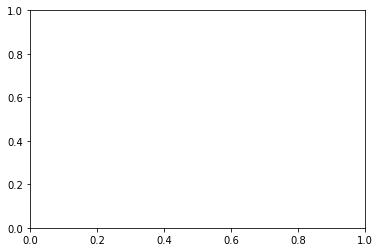

In [25]:
plt.scatter(thickness,cancer)

In [ ]:
model = LR()
model.fit(X_train, Y_train)
yp = model.predict(X_test)

1. Is clump thickness an indicator of breast cancer?

2. Is uniformity of cell size an indicator of breast cancer?

3. Is uniformity of cell shape an indicator of breast cancer?

4. Is is marginal adhesion an indicator of breast cancer?

5. Is single epithelial cell size an indicator of breast cancer?

6. Are bare nuclei an indicator of breast cancer?

7. Are bland chromatin an indicator of breast cancer?

8. Are normal nucleoli an indicator of breast cancer?

9. Is mitoses an indicator of breast cancer?

10. All together are they indicators of breast cancer?